# 1. Використаня VGG16 в якості згорткової основи для датасету fasion_mnist.

In [39]:
# Використаня VGG16 в якості згорткової основи для датасету fasion_mnist.
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras import models, layers

In [2]:
# Завантаження датасету Fashion MNIST
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()


4422102/4422102 [==============================] - 0s 0us/step


In [3]:
# Перевірка форми даних
print("Train images shape:", train_images.shape)
print("Train labels shape:", train_labels.shape)
print("Test images shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)

Train images shape: (60000, 28, 28)
Train labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)


In [4]:
# Зміна розмірності зображень на 32x32
train_images = tf.image.resize(train_images[..., tf.newaxis], [32, 32])
test_images = tf.image.resize(test_images[..., tf.newaxis], [32, 32])

In [5]:
# Збільшення кількості каналів у зображеннях з 1 до 3
train_images = tf.repeat(train_images, 3, axis=-1)
test_images = tf.repeat(test_images, 3, axis=-1)
print(train_images.shape)
print(test_images.shape)

(60000, 32, 32, 3)
(10000, 32, 32, 3)


In [6]:
# Нормалізація піксельних значень до діапазону [0, 1]
train_images = train_images / 255.0
test_images = test_images / 255.0

In [7]:
# Створення об'єкта генератора даних з параметрами аугментації для навчальних даних
train_datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Генератор даних для навчального набору
train_generator = train_datagen.flow(train_images, train_labels, batch_size=64)

# Генератор даних для валідаційного набору без аугментації
validation_datagen = ImageDataGenerator()

# Генератор даних для валідаційного набору
validation_generator = validation_datagen.flow(test_images, test_labels, batch_size=64)

In [8]:
# Завантаження VGG16
conv_base = VGG16(weights="imagenet", include_top=False, input_shape=(32, 32, 3))
conv_base.trainable = False

58889256/58889256 [==============================] - 0s 0us/step


In [9]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [10]:
# Визначення моделі
model = models.Sequential([
    conv_base,
    layers.Flatten(),
    layers.Dense(256, activation="relu"),
    layers.Dense(10, activation="softmax"), # Зміна на 10 вихідних класів, якщо це класифікація для Fashion MNIST
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 256)               131328    
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 14848586 (56.64 MB)
Trainable params: 133898 (523.04 KB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [12]:
# Компіляція моделі
model.compile(
    loss="sparse_categorical_crossentropy", # Зміна на sparse_categorical_crossentropy для багатокласової класифікації
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=2e-5),
    metrics=["accuracy"]
)

In [13]:
# Тренування моделі
history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=100, # Зменшення кількості епох для швидшого тестування
    validation_data=validation_generator,
    validation_steps=50
)

Epoch 1/100
50/50 [==============================] - 73s 1s/step - loss: 2.3875 - accuracy: 0.1072 - val_loss: 2.3077 - val_accuracy: 0.1416
Epoch 2/100
50/50 [==============================] - 70s 1s/step - loss: 2.2524 - accuracy: 0.1575 - val_loss: 2.1954 - val_accuracy: 0.2153
Epoch 3/100
50/50 [==============================] - 77s 2s/step - loss: 2.1312 - accuracy: 0.2450 - val_loss: 2.0867 - val_accuracy: 0.2744
Epoch 4/100
50/50 [==============================] - 69s 1s/step - loss: 2.0475 - accuracy: 0.3328 - val_loss: 1.9903 - val_accuracy: 0.3725
Epoch 5/100
50/50 [==============================] - 69s 1s/step - loss: 1.9687 - accuracy: 0.4325 - val_loss: 1.9122 - val_accuracy: 0.4638
Epoch 6/100
50/50 [==============================] - 73s 1s/step - loss: 1.8847 - accuracy: 0.4984 - val_loss: 1.8321 - val_accuracy: 0.5387
Epoch 7/100
50/50 [==============================] - 78s 2s/step - loss: 1.8122 - accuracy: 0.5453 - val_loss: 1.7614 - val_accuracy: 0.5688
Epoch 8/100
5

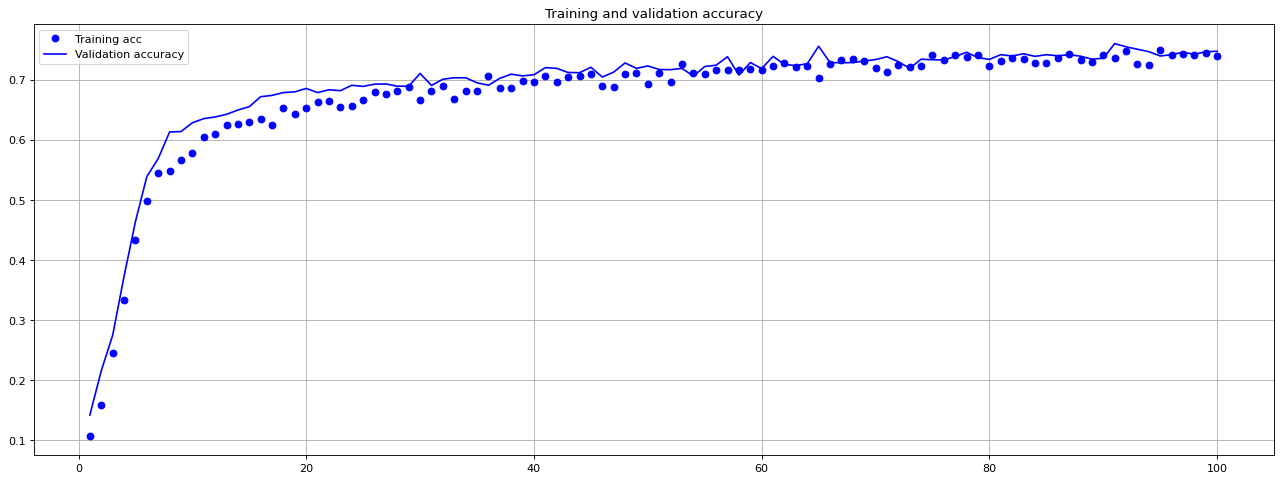

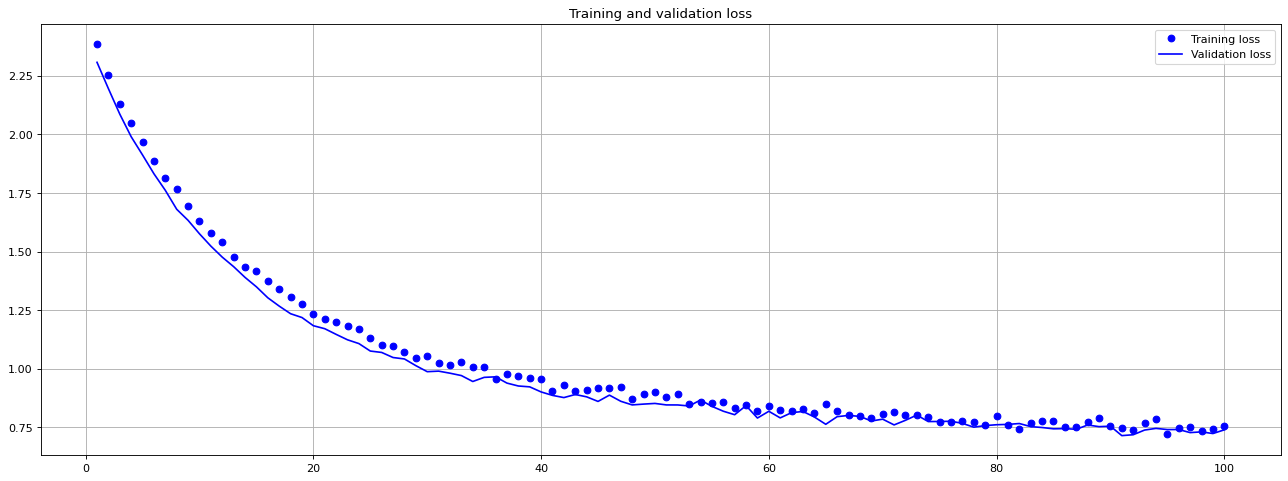

In [17]:
import matplotlib.pyplot as plt

acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(20, 7), dpi=80)
plt.grid(True)

plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")

plt.title("Training and validation accuracy")
plt.legend()

plt.figure(figsize=(20, 7), dpi=80)
plt.grid(True)

plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")

plt.legend()
plt.show()


In [28]:
from sklearn.metrics import classification_report
import numpy as np

# Отримання передбачень для тестових даних
predictions = model.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)

# Генерація classification report
report = classification_report(test_labels, predicted_classes)
print(report)

# Перевірка точності на тестових даних за допомогою генератора
test_loss, test_acc = model.evaluate(validation_generator, steps=len(test_images) // 64, verbose=2)
print(f'Test accuracy: {test_acc}')

313/313 [==============================] - 130s 414ms/step
              precision    recall  f1-score   support

           0       0.65      0.75      0.70      1000
           1       0.98      0.88      0.93      1000
           2       0.58      0.75      0.66      1000
           3       0.80      0.58      0.67      1000
           4       0.52      0.74      0.61      1000
           5       0.87      0.88      0.88      1000
           6       0.54      0.32      0.40      1000
           7       0.89      0.79      0.84      1000
           8       0.87      0.85      0.86      1000
           9       0.87      0.92      0.89      1000

    accuracy                           0.75     10000
   macro avg       0.76      0.75      0.74     10000
weighted avg       0.76      0.75      0.74     10000

156/156 - 115s - loss: 0.7351 - accuracy: 0.7458 - 115s/epoch - 740ms/step
Test accuracy: 0.7457932829856873


In [29]:
model.save("model_VGG16")

# 2. Донавчання моделі

In [30]:
conv_base = VGG16(weights="imagenet", include_top=False, input_shape=(150, 150, 3))

In [31]:
# розмороження кілька верхніх шарів у створеному раніше conv_base
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
    if layer.name == "block5_conv1":
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False


In [32]:
# Вмзначаємо модифікову модель
modified_model = models.Sequential([
   conv_base,
   layers.Flatten(),
   layers.Dense(256, activation="relu"),
   layers.Dense(1, activation="sigmoid"),
])

In [33]:
# Компілюємо модель
model.compile(
    loss="sparse_categorical_crossentropy", # Зміна на sparse_categorical_crossentropy для багатокласової класифікації
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=2e-5),
    metrics=["accuracy"]
)

In [34]:
# Навчаємо модель
history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50
)

Epoch 1/100
100/100 [==============================] - 147s 1s/step - loss: 0.7463 - accuracy: 0.7428 - val_loss: 0.7358 - val_accuracy: 0.7434
Epoch 2/100
100/100 [==============================] - 126s 1s/step - loss: 0.7475 - accuracy: 0.7412 - val_loss: 0.7354 - val_accuracy: 0.7444
Epoch 3/100
100/100 [==============================] - 124s 1s/step - loss: 0.7204 - accuracy: 0.7467 - val_loss: 0.7143 - val_accuracy: 0.7563
Epoch 4/100
100/100 [==============================] - 114s 1s/step - loss: 0.7260 - accuracy: 0.7456 - val_loss: 0.7272 - val_accuracy: 0.7531
Epoch 5/100
100/100 [==============================] - 115s 1s/step - loss: 0.7142 - accuracy: 0.7506 - val_loss: 0.6974 - val_accuracy: 0.7509
Epoch 6/100
100/100 [==============================] - 108s 1s/step - loss: 0.7211 - accuracy: 0.7431 - val_loss: 0.7175 - val_accuracy: 0.7538
Epoch 7/100
100/100 [==============================] - 116s 1s/step - loss: 0.7219 - accuracy: 0.7478 - val_loss: 0.7164 - val_accuracy:

In [35]:
# Отримання передбачень для тестових даних
predictions = model.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)

# Генерація classification report
report = classification_report(test_labels, predicted_classes)
print(report)

# Перевірка точності на тестових даних за допомогою генератора
test_loss, test_acc = model.evaluate(validation_generator, steps=len(test_images) // 64, verbose=2)
print(f'Test accuracy: {test_acc}')

313/313 [==============================] - 123s 391ms/step
              precision    recall  f1-score   support

           0       0.68      0.78      0.73      1000
           1       0.98      0.91      0.95      1000
           2       0.63      0.77      0.69      1000
           3       0.85      0.64      0.73      1000
           4       0.58      0.76      0.66      1000
           5       0.90      0.91      0.90      1000
           6       0.54      0.38      0.44      1000
           7       0.90      0.85      0.88      1000
           8       0.92      0.91      0.91      1000
           9       0.91      0.94      0.92      1000

    accuracy                           0.78     10000
   macro avg       0.79      0.78      0.78     10000
weighted avg       0.79      0.78      0.78     10000

156/156 - 105s - loss: 0.6082 - accuracy: 0.7838 - 105s/epoch - 674ms/step
Test accuracy: 0.7837539911270142


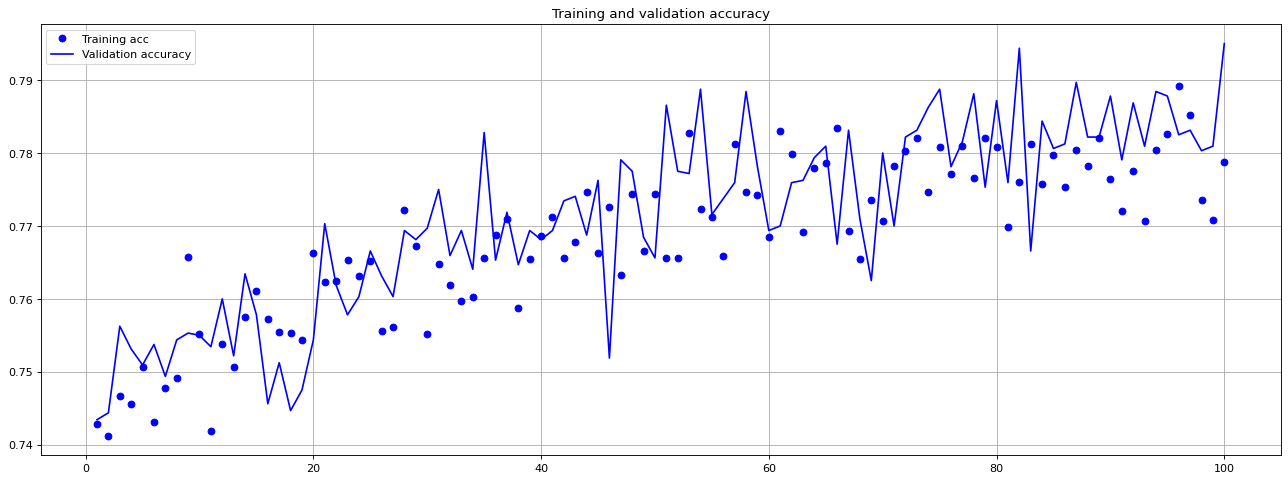

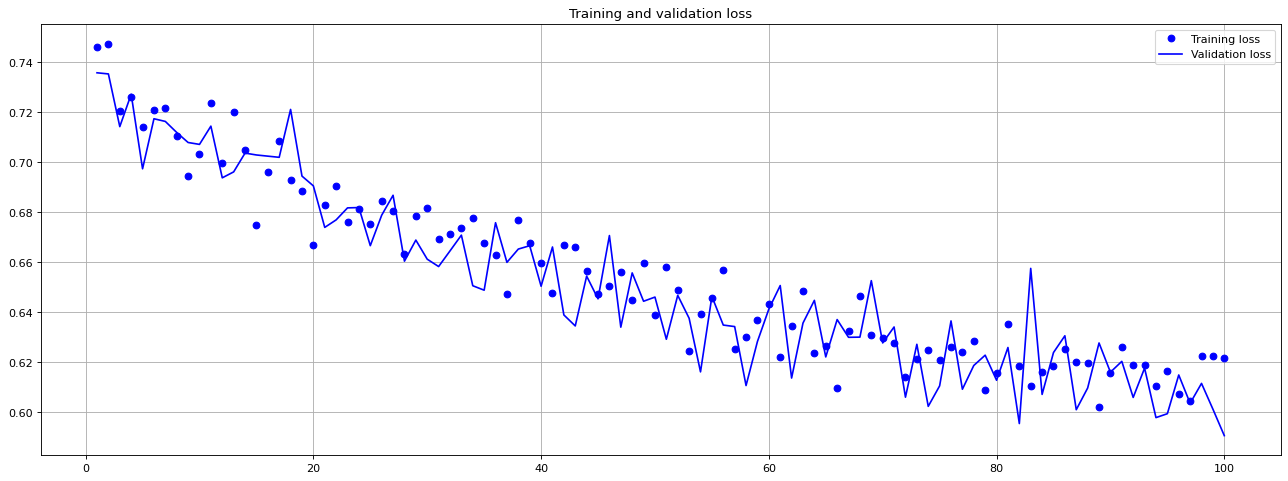

In [36]:
import matplotlib.pyplot as plt

acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(20, 7), dpi=80)
plt.grid(True)

plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")

plt.title("Training and validation accuracy")
plt.legend()

plt.figure(figsize=(20, 7), dpi=80)
plt.grid(True)

plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")

plt.legend()
plt.show()

In [38]:
modified_model.save("modified_model_VGG16")

**Висновок:** Застосування VGG16 в якості згорткової основи для датасету алгоритмів генератора та подальне донавчання створеної мережі показало  покращення точності і інших метрик якості, але неістотно. ТОбто по суті донавчання відбулося на базі вже досягнугнутої точності, але покразилось незначно, навіть беруи під увагу велику кількість епох. Варто відмінити те, що модель, навіть при такій великій кількості епох не стала перенавченою. Але залишилась з відносно невисокими показниками точності - бльзько 0.78.